# Linear regression using Diabetes toy dataset

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
diabetes_DB = sk.datasets.load_diabetes(as_frame=True, scaled = False)
diabetes_DB.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

- Data description: https://hastie.su.domains/Papers/LARS/LeastAngle_2002.pdf


In [3]:
X = diabetes_DB['data']
y = diabetes_DB['target']

In [4]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [5]:
pd.concat([X,y], axis = 1).corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


The correlation to the target variable is relatively higher with Triglycerides, BMI and Blood pressure.

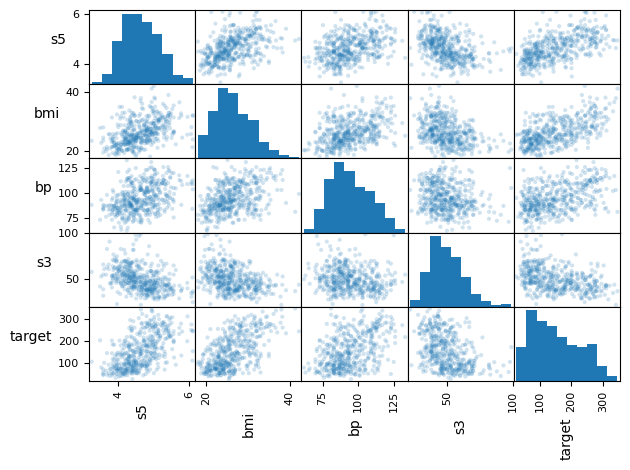

In [6]:
import matplotlib.pyplot as plt

axes = pd.plotting.scatter_matrix(pd.concat([X[['s5', 'bmi', 'bp', 's3']],y], axis = 1),
                                   alpha=0.2)

# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()
    

A light positive linear relation between target and three variables - s5, bmi, bp. And maybe a non-linear relation between s3 and target. A non-linear relation to dig further if we have more categorial informations - to differenciate by group. Or, we can use a generalized additive model to take into account a polynomial relation while calibrating our model. 

Re scale the dataset before computing

In [7]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X[['s3', 's5', 'bmi', 'bp']])
pd.DataFrame(X_std).describe().round(2)

,0,1,2,3
count,442.00,442.00,442.00,442.00
mean,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-2.15,-2.65,-1.90,-2.36
25%,-0.74,-0.70,-0.72,-0.77
50%,-0.14,-0.04,-0.15,-0.12
75%,0.62,0.68,0.66,0.75
max,3.81,2.81,3.59,2.78


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

In [9]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)

Coefficients:  [-10.73715742  20.38580889  28.22090162  14.40981904]
Intercept:  151.605024161537


In [10]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)
  
# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)

print ('Intercept: ', intercept_original)

Coefficients:  [-0.83107748 39.0682958   6.39477199  1.04300859]
Intercept:  -255.733742206034


In [14]:
data_view= pd.concat([X,y], axis = 1)

Text(0, 0.5, 'Diabetes')

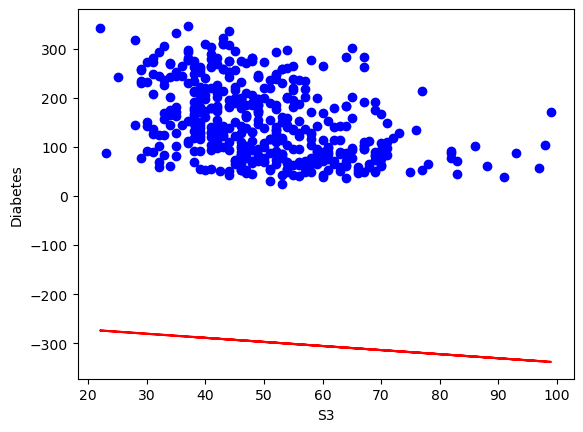

In [ ]:
plt.scatter(data_view[['s3']], data_view[['target']],  color='blue')
plt.plot(data_view[['s3']], coef_original[0] * data_view[['s3']] + intercept_original , '-r')
plt.xlabel("S3")
plt.ylabel("Diabetes")